In [41]:
import numpy as np
import pandas as pd


In [42]:
train_df = pd.read_csv('./data/train.csv', index_col=0)
test_df = pd.read_csv('./data/test.csv', index_col=0)

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ACD450B88>,
      dtype=object)

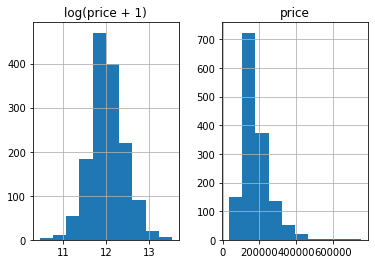

In [43]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [44]:
y_train = np.log1p(train_df.pop('SalePrice'))
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape

(2919, 79)

In [45]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [46]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [47]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [48]:
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()


,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [51]:
mean_cols = all_dummy_df.mean()
mean_cols.head()

LotFrontage       69.305795
LotArea        10168.114080
OverallQual        6.089072
OverallCond        5.564577
YearBuilt       1971.312778
dtype: float64

In [52]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [53]:
all_dummy_df.isnull().sum().sum()

0

In [54]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [55]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()

all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols]
                                     - numeric_col_means) / numeric_col_std

In [56]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [57]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [58]:
# Ridge Regression  岭回归

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [59]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [60]:
# 交叉验证
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alpha vs CV Error')

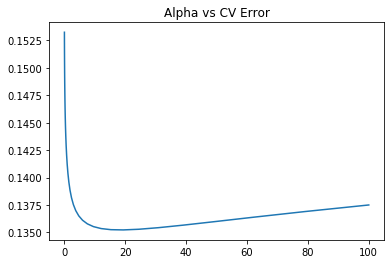

In [61]:
import matplotlib.pyplot as plt
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")

In [62]:
from sklearn.ensemble import RandomForestRegressor

max_features = [.1, .3, .5, .7, .9, .99]

test_scores = []

for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    
    test_score = np.sqrt(-cross_val_score(
        clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Max Features vs CV Error')

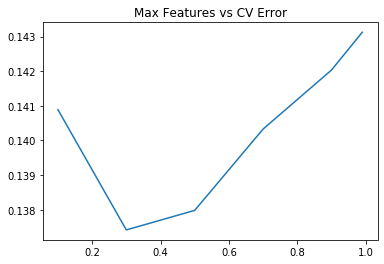

In [63]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")

In [64]:
# 模型融合

ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=.3)


In [65]:
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [67]:
y_final = (y_ridge + y_rf) / 2


In [68]:
submission_df = pd.DataFrame(
    data={'Id' : test_df.index, 'SalePrice' : y_final})
submission_df.head(10)

,Id,SalePrice
0,1461,119610.741090
1,1462,151185.367708
2,1463,174104.392414
3,1464,190011.785806
4,1465,196419.483913
5,1466,176268.289489
6,1467,177209.860626
7,1468,169480.091012
8,1469,183883.095919
9,1470,122982.874007


In [69]:
submission_df.to_csv('./data/submission_from_csdn.csv', index=False)

In [70]:
from sklearn.ensemble import BaggingRegressor

In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=15)
params = [1, 20, 30, 40, 50, 60, 70]
BaggingRegressor_test_scores = []
for param in params:
    BaggingRegressor_clf = BaggingRegressor(
        n_estimators=param, base_estimator=ridge)
    BaggingRegressor_test_score = np.sqrt(
        -cross_val_score(BaggingRegressor_clf, X_train, y_train, cv=15, scoring='neg_mean_squared_error'))
    BaggingRegressor_test_scores.append(np.mean(BaggingRegressor_test_score))

Text(0.5, 1.0, 'Bagging_n_estimator vs CV Error')

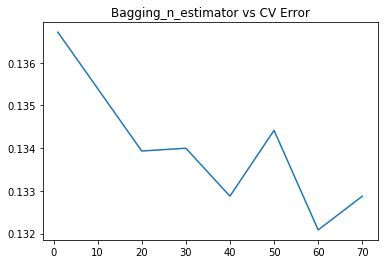

In [72]:
plt.plot(params, BaggingRegressor_test_scores)
plt.title("Bagging_n_estimator vs CV Error")

In [73]:
# 增强学习
from sklearn.ensemble import AdaBoostRegressor
AdaBoostRegressor_params = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
AdaBoostRegressor_test_scores = []
for params in AdaBoostRegressor_params:
    AdaBoostRegressor_clf = AdaBoostRegressor(n_estimators=params, base_estimator=ridge)
    AdaBoostRegressor_test_score = np.sqrt(-cross_val_score(
        AdaBoostRegressor_clf, X_train, y_train, cv=15, scoring='neg_mean_squared_error' ))
    AdaBoostRegressor_test_scores.append(np.mean(AdaBoostRegressor_test_score))

Text(0.5, 1.0, 'AdaBoostRegressor_n_estimator vs CV Error')

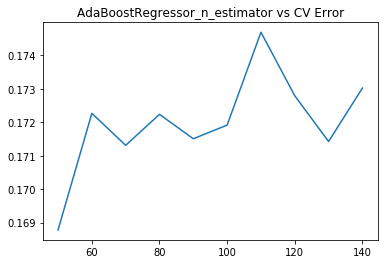

In [74]:
plt.plot(AdaBoostRegressor_params, AdaBoostRegressor_test_scores)
plt.title("AdaBoostRegressor_n_estimator vs CV Error")

In [75]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor
XGBRegressor_params = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
XGBRegressor_test_scores = []
for param in XGBRegressor_params:
    XGBRegressor_clf = XGBRegressor(max_depth=param)
    XGBRegressor_test_score = np.sqrt(-cross_val_score(
        XGBRegressor_clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    XGBRegressor_test_scores.append(np.mean(XGBRegressor_test_score))

[14:41:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:07] WARNI

[14:42:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:26] WARNI

In [ ]:
plt.plot(XGBRegressor_params, XGBRegressor_test_scores)
plt.title('xgboost_Max_depth vs CV Error')

In [ ]:
xg = XGBRegressor(max_depth=5)
xg.fit(X_train, y_train)

In [ ]:
y_final = np.expm1(xg.predict(X_test))
submission_df = pd.DataFrame(data={'Id' : test_df.index,
                                  'SalePrice': y_final})
submission_df.head(10)

In [ ]:
submission_df.to_csv('./data/submission_from_csdn_xg.csv', index=False)

Text(0.5, 1.0, 'xgboost_Max_depth vs CV Error')

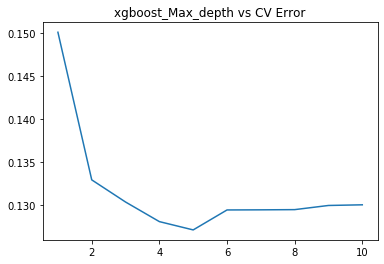

In [77]:
xg = XGBRegressor(max_depth=5)
xg.fit(X_train, y_train)

[14:47:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [78]:
y_final = np.expm1(xg.predict(X_test))
submission_df = pd.DataFrame(data={'Id' : test_df.index,
                                  'SalePrice': y_final})
submission_df.head(10)

,Id,SalePrice
0,1461,121317.992188
1,1462,160514.984375
2,1463,184872.671875
3,1464,188044.953125
4,1465,187002.328125
5,1466,176525.343750
6,1467,176312.000000
7,1468,163346.546875
8,1469,190007.890625
9,1470,122269.976562


In [79]:
submission_df.to_csv('./data/submission_from_csdn_xg.csv', index=False)